# Seidel Switching Disconnection #

The goal with this project is to determine how many Seidel switchings it takes on average to disconnect a the complete graph on N vertices.

#### Import Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import copy as copy
import numpy as np
import random as rd

#### Create the Seidel switching function

In [2]:
def switch(G,v):
    ''' This function will take a graph G and one of it's vertices v, and will output the switching on this vertex '''
    
    nonneighbors = nx.non_neighbors(G, v)
    
    H = copy.deepcopy(G)
    #This will remove all the edges currently incident to v
    H.remove_node(v)
    H.add_node(v)
    
    #This adds the possible edges that were initially not incident to v
    for n in nonneighbors:
        H.add_edge(v,n)
        
    return(H)

#### Create the switchings to disconnect function

In [4]:
def switchings_to_disconnect(G):
    '''This will find the number of random switchings to disconnect graph G'''
    switchings = 0
    disconnected = False
    while nx.is_connected(G):
        G = switch(G,rd.sample(G.nodes,1)[0])
        switchings += 1
        
        if switchings > 100000:
            return 'Timed Out'
    return switchings

## Trials ##

I will now perform trials on various common graphs. I will perform trials on graphs of various sizes as well, for comparison.

#### Petersen Graph ####

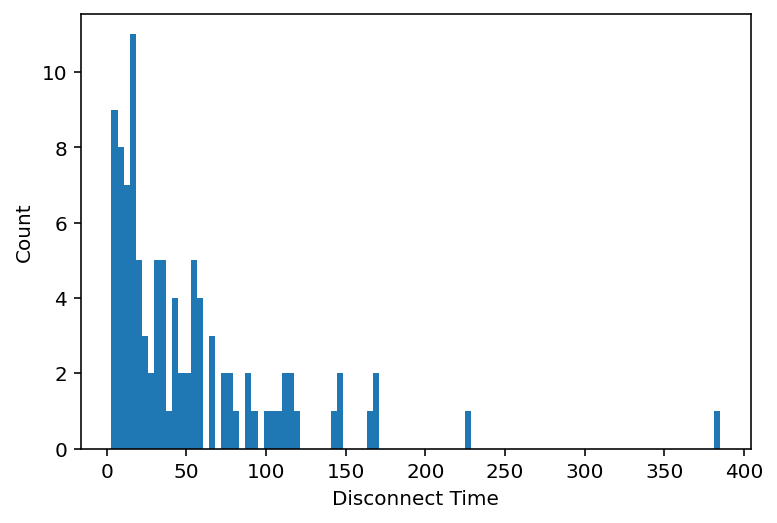

In [23]:
#Define the graph to test
G = nx.petersen_graph()
#Determine the number of trials
num_trials = 100
#Create an array with the results
time_to_disconnect = np.zeros(num_trials)

for i in range(num_trials):
    time_to_disconnect[i] = switchings_to_disconnect(G)

matplotlib.pyplot.hist(time_to_disconnect, bins = 100)
plt.xlabel('Disconnect Time')
plt.ylabel('Count')
plt.show()

#### Cycle Graphs ####

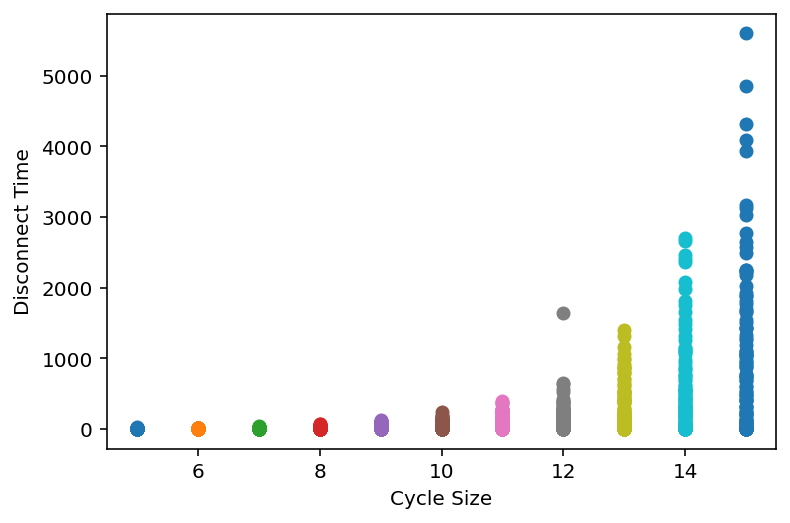

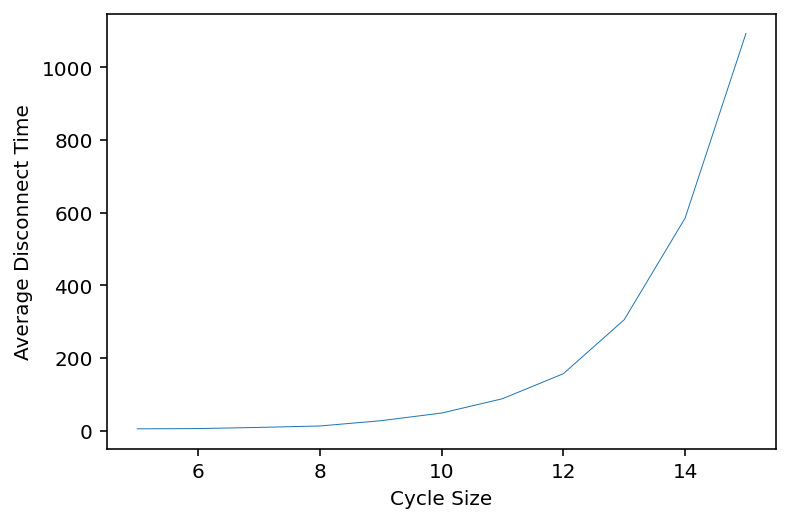

In [24]:
def cycle_disconnect(min_size, max_size, num_trials):
    '''This function will determine the number of switchings to disconnect a cycle graph'''
    
    avg_disconnect = []
    sizes = []
    for i in range(min_size, max_size + 1):
        sizes.append(i)
        
    #Define the graph to test
        G = nx.cycle_graph(i)
    #Create an array with the results
        time_to_disconnect = np.zeros(num_trials)
        X = np.zeros(num_trials)
        for j in range(num_trials):
            time_to_disconnect[j] = switchings_to_disconnect(G)
            X[j] = i
        plt.scatter(X,time_to_disconnect)
        avg_disconnect.append(np.average(time_to_disconnect))
        
    plt.xlabel('Cycle Size')
    plt.ylabel('Disconnect Time')
    plt.show()
    
    plt.plot(sizes,avg_disconnect, linewidth = 0.5, alpha = 1)
    plt.xlabel('Cycle Size')
    plt.ylabel('Average Disconnect Time')
    plt.linewidths = 0.5
    plt.show()
    return

    
    
cycle_disconnect(5,15,100)

#### Complete Graphs ####

The number of switches will always be 1, as expected.

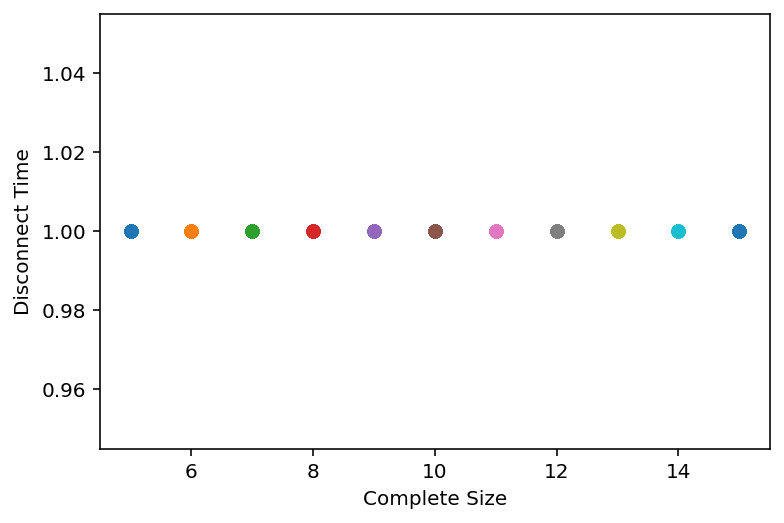

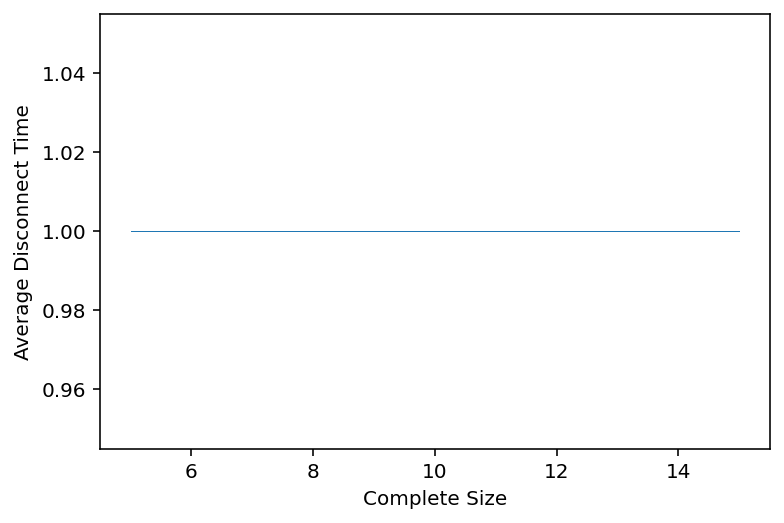

In [25]:
def complete_disconnect(min_size, max_size, num_trials):
    '''This function will determine the number of switchings to disconnect a complete graph'''
    
    avg_disconnect = []
    sizes = []
    for i in range(min_size, max_size + 1):
        sizes.append(i)
        
    #Define the graph to test
        G = nx.complete_graph(i)
    #Create an array with the results
        time_to_disconnect = np.zeros(num_trials)
        X = np.zeros(num_trials)
        for j in range(num_trials):
            time_to_disconnect[j] = switchings_to_disconnect(G)
            X[j] = i
        plt.scatter(X,time_to_disconnect)
        avg_disconnect.append(np.average(time_to_disconnect))
        
    plt.xlabel('Complete Size')
    plt.ylabel('Disconnect Time')
    plt.show()
    
    plt.plot(sizes,avg_disconnect, linewidth = 0.5, alpha = 1)
    plt.xlabel('Complete Size')
    plt.ylabel('Average Disconnect Time')
    plt.linewidths = 0.5
    plt.show()
    return

    
complete_disconnect(5,15,100)

#### Star Graphs ####

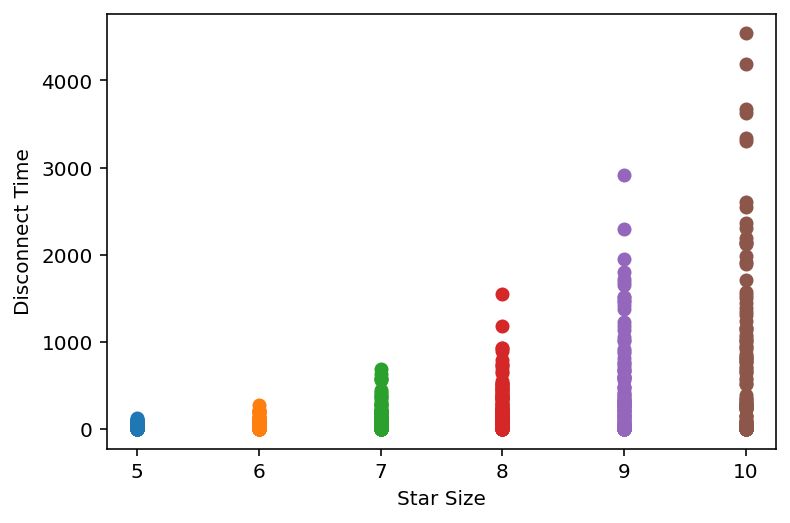

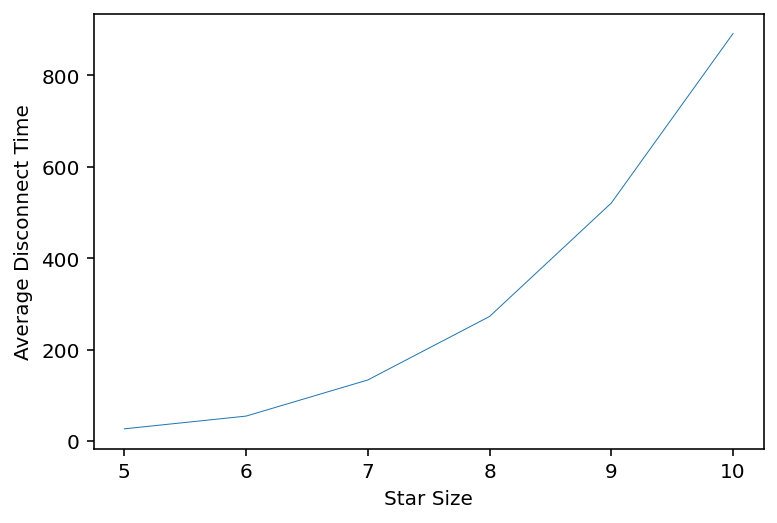

In [26]:
def star_disconnect(min_size, max_size, num_trials):
    '''This function will determine the number of switchings to disconnect a star graph'''
    
    avg_disconnect = []
    sizes = []
    for i in range(min_size, max_size + 1):
        sizes.append(i)
        
    #Define the graph to test
        G = nx.star_graph(i)
    #Create an array with the results
        time_to_disconnect = np.zeros(num_trials)
        X = np.zeros(num_trials)
        for j in range(num_trials):
            time_to_disconnect[j] = switchings_to_disconnect(G)
            X[j] = i
        plt.scatter(X,time_to_disconnect)
        avg_disconnect.append(np.average(time_to_disconnect))
        
    plt.xlabel('Star Size')
    plt.ylabel('Disconnect Time')
    plt.show()
    
    plt.plot(sizes,avg_disconnect, linewidth = 0.5, alpha = 1)
    plt.xlabel('Star Size')
    plt.ylabel('Average Disconnect Time')
    plt.linewidths = 0.5
    plt.show()
    return

star_disconnect(5,10,100)

#### Wheel Graphs

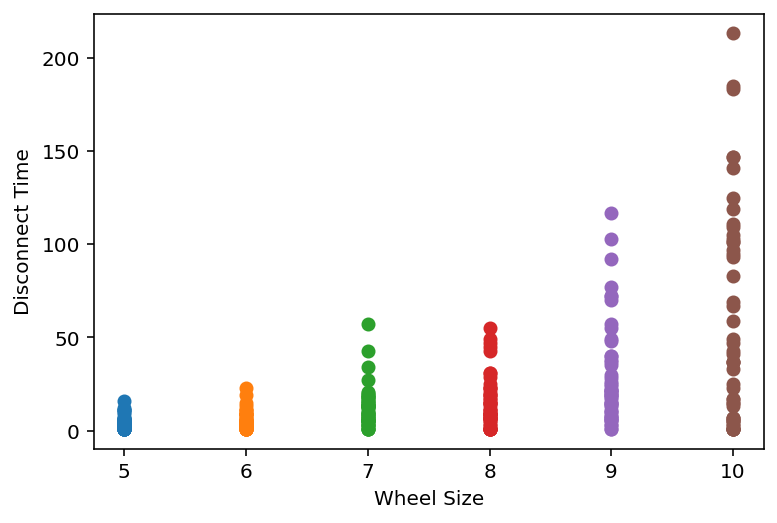

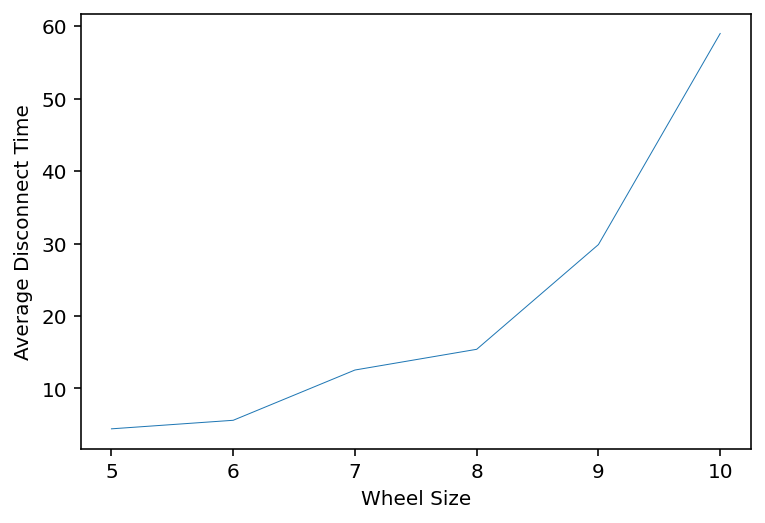

In [5]:
def wheel_disconnect(min_size, max_size, num_trials):
    '''This function will determine the number of switchings to disconnect a wheel graph'''
    
    avg_disconnect = []
    sizes = []
    for i in range(min_size, max_size + 1):
        sizes.append(i)
        
    #Define the graph to test
        G = nx.wheel_graph(i)
    #Create an array with the results
        time_to_disconnect = np.zeros(num_trials)
        X = np.zeros(num_trials)
        for j in range(num_trials):
            time_to_disconnect[j] = switchings_to_disconnect(G)
            X[j] = i
        plt.scatter(X,time_to_disconnect)
        avg_disconnect.append(np.average(time_to_disconnect))
        
    plt.xlabel('Wheel Size')
    plt.ylabel('Disconnect Time')
    plt.show()
    
    plt.plot(sizes,avg_disconnect, linewidth = 0.5, alpha = 1)
    plt.xlabel('Wheel Size')
    plt.ylabel('Average Disconnect Time')
    plt.linewidths = 0.5
    plt.show()
    return

wheel_disconnect(5,10,50)

Finally, I will also do this for Erdos-Renyi Graphs.

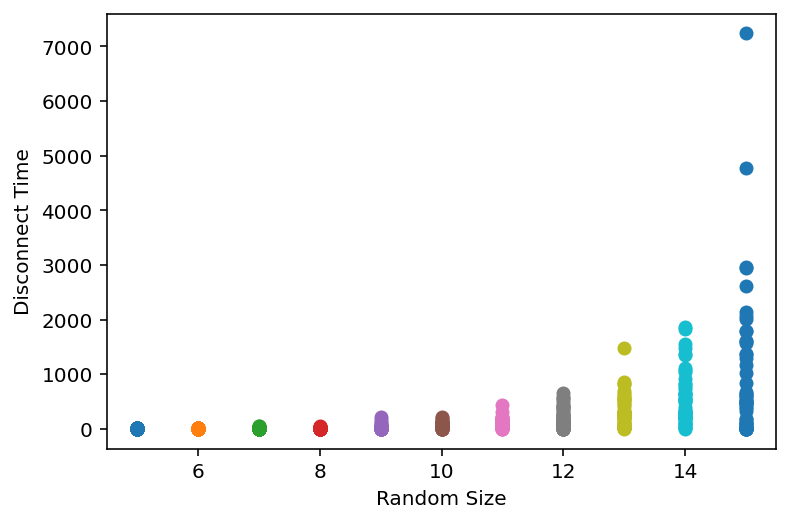

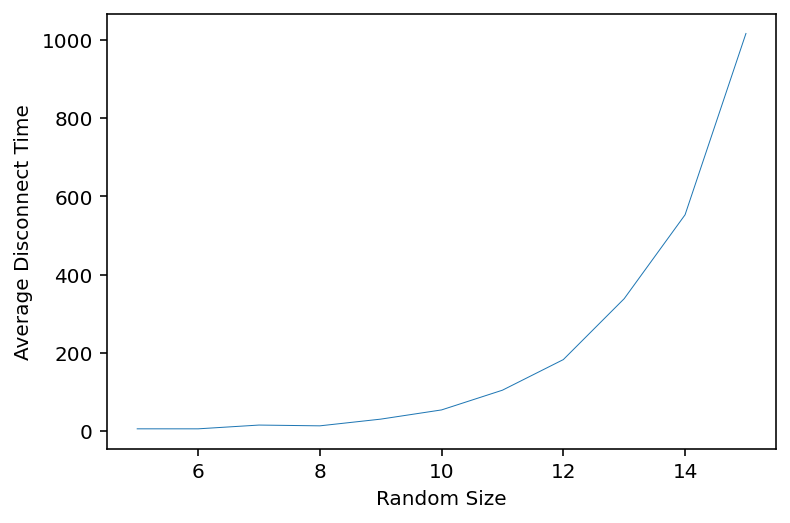

In [28]:
def random_disconnect(min_size, max_size, num_trials,p = 0.5):
    '''This function will determine the number of switchings to disconnect a Erdos-Renyi Random graph'''
    
    avg_disconnect = []
    sizes = []
    for i in range(min_size, max_size + 1):
        sizes.append(i)
        
    #Define the graph to test
        G = nx.fast_gnp_random_graph(i, p, seed=None)
    #Create an array with the results
        time_to_disconnect = np.zeros(num_trials)
        X = np.zeros(num_trials)
        for j in range(num_trials):
            time_to_disconnect[j] = switchings_to_disconnect(G)
            X[j] = i
        plt.scatter(X,time_to_disconnect)
        avg_disconnect.append(np.average(time_to_disconnect))
        
    plt.xlabel('Random Size')
    plt.ylabel('Disconnect Time')
    plt.show()
    
    plt.plot(sizes,avg_disconnect, linewidth = 0.5, alpha = 1)
    plt.xlabel('Random Size')
    plt.ylabel('Average Disconnect Time')
    plt.linewidths = 0.5
    plt.show()
    return

random_disconnect(5,15,50, 0.75)